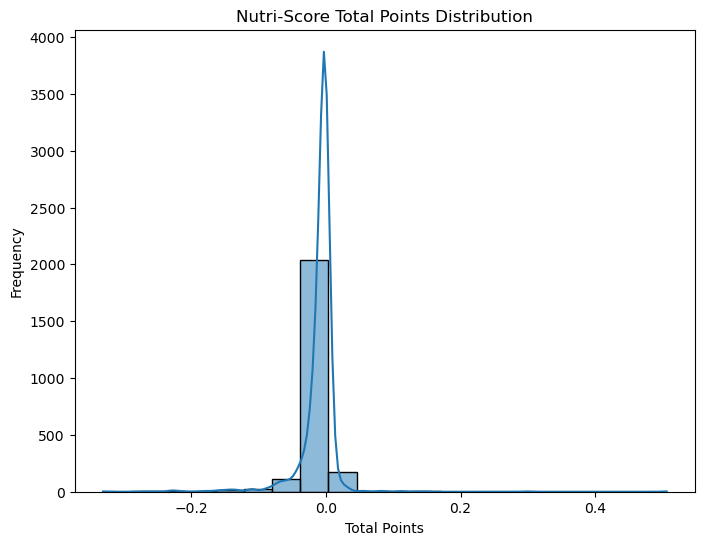

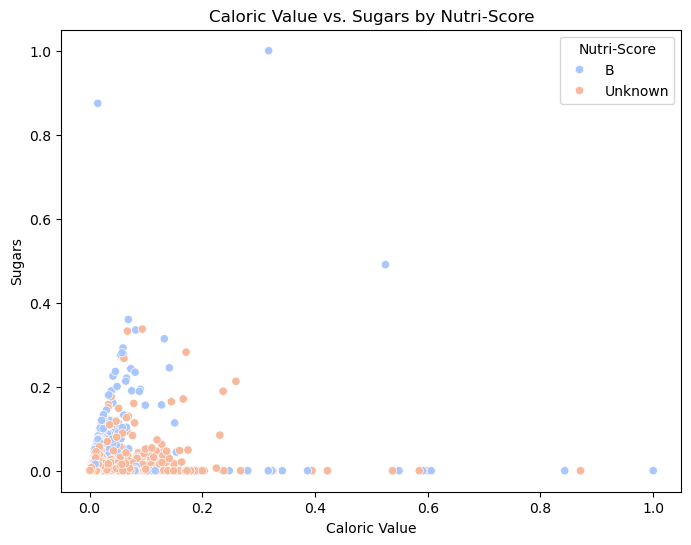

C:\Users\buse\AppData\Local\Temp\ipykernel_43196\837767525.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Nutri-Score", y="Caloric Value", palette="Set2")


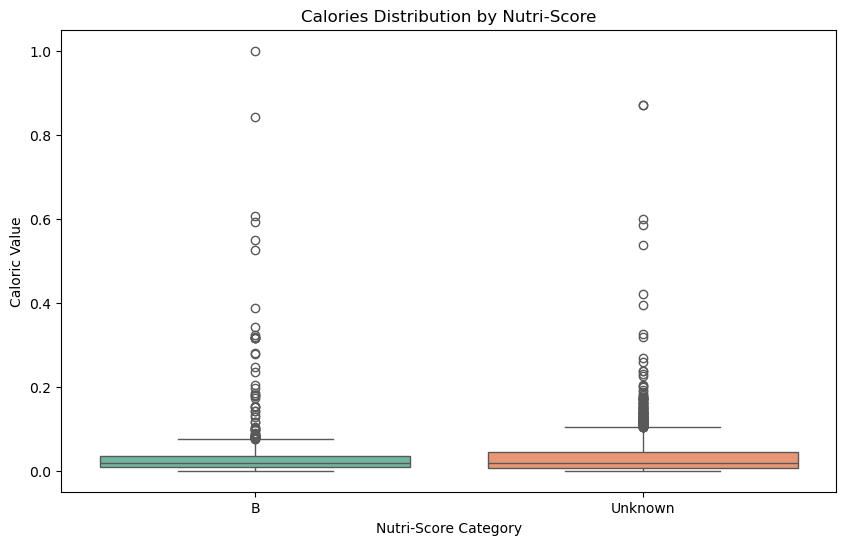

✅ İşlenmiş veri 'processed_food_data.csv' olarak kaydedildi.
   Unnamed: 0.1  Unnamed: 0                              food  Caloric Value  \
0      0.000000    0.000000                      cream cheese       0.008392   
1      0.001387    0.001387                 neufchatel cheese       0.035379   
2      0.002774    0.002774  requeijao cremoso light catupiry       0.008063   
3      0.004161    0.004161                    ricotta cheese       0.004937   
4      0.005548    0.005548              cream cheese low fat       0.004937   

        Fat  Saturated Fats  Monounsaturated Fats  Polyunsaturated Fats  \
0  0.009079        0.004315              0.004466              0.001064   
1  0.035228        0.016220              0.016833              0.004255   
2  0.006537        0.003423              0.003092              0.000000   
3  0.003632        0.001935              0.001718              0.000011   
4  0.004177        0.002083              0.002061              0.000223   

   Carb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os

# File paths
file_paths = [
    "C:/Users/buse/Downloads/FOOD-DATA-GROUP1.csv",
    "C:/Users/buse/Downloads/FOOD-DATA-GROUP2.csv",
    "C:/Users/buse/Downloads/FOOD-DATA-GROUP3.csv",
    "C:/Users/buse/Downloads/FOOD-DATA-GROUP4.csv",
    "C:/Users/buse/Downloads/FOOD-DATA-GROUP5.csv"
]

# Read and merge data
dfs = [pd.read_csv(file) for file in file_paths if os.path.exists(file)]
df = pd.concat(dfs, ignore_index=True)

# Data cleaning: Fill missing values and remove duplicates
df.drop_duplicates(inplace=True)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Normalize nutrition values (standardization)
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Nutri-Score calculation function
def calculate_nutri_score(row):
    negative_score = (
        (row["Caloric Value"] / 100) +  # Kalori
        (row["Sugars"] / 10) +          # Şeker
        (row["Saturated Fats"] / 2) +   # Doymuş Yağlar
        (row["Sodium"] / 400)           # Sodyum
    )
    
    positive_score = (
        (row["Protein"] / 5) +         # Protein
        (row["Dietary Fiber"] / 3)     # Lif
    )
    
    return negative_score - positive_score

# Nutri-Score classification function
def classify_nutri_score(points):
    if -15 <= points <= -1:
        return "A"
    elif 0 <= points <= 2:
        return "B"
    elif 3 <= points <= 10:
        return "C"
    elif 11 <= points <= 18:
        return "D"
    elif 19 <= points <= 40:
        return "E"
    else:
        return "Unknown"

# Calculate and classify Nutri-Score
df["Total Points"] = df.apply(calculate_nutri_score, axis=1)
df["Nutri-Score"] = df["Total Points"].apply(classify_nutri_score)

# NOVA classification function
def classify_nova(row):
    if row["Sodium"] > 400 or row["Sugars"] > 20 or row["Saturated Fats"] > 5:
        return "NOVA 4 (Ultra-Processed)"
    elif row["Sodium"] > 100 or row["Sugars"] > 5 or row["Saturated Fats"] > 2:
        return "NOVA 3 (Processed)"
    elif row["Sodium"] > 50 or row["Sugars"] > 2:
        return "NOVA 2 (Processed Ingredients)"
    else:
        return "NOVA 1 (Unprocessed/Minimally Processed)"

# Calculate NOVA classification
df["NOVA Classification"] = df.apply(classify_nova, axis=1)

# Trend analysis for Nutri-Score and NOVA categories
nutri_nova_trends = df.groupby(["Nutri-Score", "NOVA Classification"]).size().unstack()

# Visualization: Histogram, Scatter Plot, Boxplot

# Histogram: Nutri-Score Total Points Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["Total Points"], bins=20, kde=True)
plt.title("Nutri-Score Total Points Distribution")
plt.xlabel("Total Points")
plt.ylabel("Frequency")
plt.show()

# Scatter Plot: Caloric Value vs Sugars (Colored by Nutri-Score)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Caloric Value", y="Sugars", hue="Nutri-Score", palette="coolwarm")
plt.title("Caloric Value vs. Sugars by Nutri-Score")
plt.xlabel("Caloric Value")
plt.ylabel("Sugars")
plt.show()

# Boxplot: Calories Distribution by Nutri-Score
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Nutri-Score", y="Caloric Value", palette="Set2")
plt.title("Calories Distribution by Nutri-Score")
plt.xlabel("Nutri-Score Category")
plt.ylabel("Caloric Value")
plt.show()

# Save updated data as CSV
df.to_csv("C:/Users/buse/Downloads/processed_food_data.csv", index=False)
print("✅ İşlenmiş veri 'processed_food_data.csv' olarak kaydedildi.")

# Display the first few rows
print(df.head())
